# Проект "Анализ тональности комментариев в паблике про королевскую семью великобритании".

###Выполнили: Крицкая, Ходова, Редькина, Мокринский

Цель: проанализировать контекст комментариев в ТГ-канале о королевской семье

Задачи:  

1.   Определить тональность комментариев в ТГ-канале
2.   Определить тональность комментариев с упоминанием отдельных членов королевской семьи
3. Определить кто самый часто упоминаемый член королевской семьи в комментариях
4. Определить кто из членов королевской семьи получает больше негатива и позитива исходя из тональности комментариев с упоминанием персоны

Анализируемый ТГ-канал: https://t.me/babkin_prestol


In [ ]:
#настроим подключение к telegramm API для загрузки постов
! pip install telethon
from telethon.sync import TelegramClient
import pandas as pd
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

In [ ]:
#убрали свой токен, чтобы код работал нужен ваш токен и !ВАЖНО! подписка на тг-канал с аккаунта, на который получен токен
api_id = #ваш id
api_hash = #ваш хэш
phone = #ваш номер
channel_link = "t.me/babkin_prestol"

client = TelegramClient('session_name.json', api_id, api_hash)

In [ ]:
await client.start()

In [ ]:
me = await client.get_me()

In [ ]:
async def main():
    # инициализация клиента – тут добавили json файл для сохранения сессии, чтобы обойти database block (выскакивал при первых попытках)
    client = TelegramClient('session_name.json', api_id, api_hash)
    await client.start(phone)

    me = await client.get_me()
    dialogs = await client.get_dialogs()

    # ищем нужный канал в диалогах
    #ВАЖНО! чтобы код работал аккаунт с которого получен API должен быть подписан на канал, чтобы он был в диалогах
    for dialog in dialogs:
        if dialog.title == 'Бабкин Престол 2.0':
            messages = client.iter_messages(dialog)
            break

    messages_info = []
    comments_info = []

    i = 0
    # выгрузим сообщения из канала – поставили лимит в 100 сообщений, изначально для теста программы, но потом оставили так как получаем достаточно комментариев
    async for message in messages:
        if i < 100:
            messages_info.append([message.id, str(message.date), message.message, message.views, message.forwards, message.replies.replies if message.replies else None])
            i += 1

            # выгрузим комментарии для текущего сообщения
            if message.replies and message.replies.replies > 0:
                async for comment in client.iter_messages(dialog, reply_to=message.id):
                    comments_info.append([message.id, comment.id, str(comment.date), comment.message, comment.from_id])
        else:
            break

    # создадим датафрейм для сообщений
    mess_df = pd.DataFrame(messages_info, columns=['post_id', 'date', 'text', 'views', 'forwards', 'replies'])

    # создадим датафрейм для комментариев
    comments_df = pd.DataFrame(comments_info, columns=['post_id', 'comment_id', 'date', 'text', 'from_id'])

    return mess_df, comments_df

mess_df, comments_df = asyncio.get_event_loop().run_until_complete(main())

/usr/lib/python3.10/asyncio/streams.py:133: RuntimeWarning: coroutine 'main' was never awaited
  self._drain_waiters = collections.deque()
ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-48' coro=<Connection._send_loop() done, defined at /usr/local/lib/python3.10/dist-packages/telethon/network/connection/connection.py:310> wait_for=<Future cancelled>>
Exception ignored in: <coroutine object Connection._recv_loop at 0x7b896cb7f3e0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/asyncio/streams.py", line 133, in __init__
    self._drain_waiters = collections.deque()
RuntimeError: coroutine ignored GeneratorExit
ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-49' coro=<Connection._recv_loop() running at /usr/local/lib/python3.10/dist-packages/telethon/network/connection/connection.py:355> wait_for=<Future pending cb=[Task.__wakeup()]>>
ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pendi

In [ ]:
#выведем полученные датафреймы, чтобы посмотреть, что всё сработало
mess_df

,post_id,date,text,views,forwards,replies
0,25241,2024-06-16 08:37:45+00:00,А в главном аккаунте в честь Дня отца архивное...,11426,0,34.0
1,25239,2024-06-16 08:35:11+00:00,,11902,0,0.0
2,25238,2024-06-16 08:20:09+00:00,"""С Днем отца, Па"" ❤️\n\nСегодня в Великобритан...",13645,0,36.0
3,25237,2024-06-16 08:02:25+00:00,,15499,0,NaN
4,25236,2024-06-16 08:02:25+00:00,,15503,0,NaN
...,...,...,...,...,...,...
95,25143,2024-06-14 08:03:02+00:00,,36569,0,NaN
96,25142,2024-06-14 08:03:02+00:00,,36160,0,NaN
97,25141,2024-06-14 08:03:02+00:00,🎾 Зара и Майк посетили премьерный показ фильма...,36194,0,75.0
98,25140,2024-06-14 06:02:40+00:00,С пятницей! 🥂\n\nСегодня у нас королевские нов...,35147,0,11.0


In [ ]:
comments_df

,post_id,comment_id,date,text,from_id
0,25241,1003553,2024-06-16 09:57:46+00:00,«и тем кто сегодня скучает по родителям» 🥹💔,PeerUser(user_id=1295174726)
1,25241,1003550,2024-06-16 09:55:52+00:00,"Есть в этих старинных колясках надёжность,уют,...",PeerUser(user_id=1763814689)
2,25241,1003545,2024-06-16 09:47:59+00:00,"Она родная тётя для Уильяма, а для Луи двоюрод...",PeerUser(user_id=887013284)
3,25241,1003544,2024-06-16 09:47:53+00:00,"У меня тоже в первую секунду возникла мысль, ч...",PeerUser(user_id=5622734618)
4,25241,1003542,2024-06-16 09:46:50+00:00,"Как очень трогательно ,и грустно (((",PeerUser(user_id=1300661528)
...,...,...,...,...,...
5713,25139,997306,2024-06-13 16:20:43+00:00,June marriages are lucky 🍀,PeerUser(user_id=5146239759)
5714,25139,997305,2024-06-13 16:20:40+00:00,У них видимо только мальчики получаются😁,PeerUser(user_id=1689571071)
5715,25139,997304,2024-06-13 16:20:30+00:00,"Только 9, а ощущение как будто они уже даже до...",PeerUser(user_id=439539625)
5716,25139,997303,2024-06-13 16:20:15+00:00,С годовщиной свадьбы !🌹🌹🌹🌹🌹🌹🌹🌹🌹,PeerUser(user_id=5269362119)


Датафрейм с комментариями получился в 57 раз больше датафрейма с постами, что говорит о том, что в среднем под постом собиралось 57 комментариев. Такой массив кажется оптимальным для анализа, поэтому увеличивать количество выгружаемых постов мы не будем. При таком подходе в нашем датафрейме содержатся комментарии примерно за 3 дня.

In [ ]:
import numpy as np

In [ ]:
comments_df.replace('', np.nan, inplace=True)
# почистим датафрейм от пустых значений, если такие есть
comments_df_cleanned = comments_df.dropna(subset=['text'])
comments_df_cleanned

,post_id,comment_id,date,text,from_id
0,25241,1003553,2024-06-16 09:57:46+00:00,«и тем кто сегодня скучает по родителям» 🥹💔,PeerUser(user_id=1295174726)
1,25241,1003550,2024-06-16 09:55:52+00:00,"Есть в этих старинных колясках надёжность,уют,...",PeerUser(user_id=1763814689)
2,25241,1003545,2024-06-16 09:47:59+00:00,"Она родная тётя для Уильяма, а для Луи двоюрод...",PeerUser(user_id=887013284)
3,25241,1003544,2024-06-16 09:47:53+00:00,"У меня тоже в первую секунду возникла мысль, ч...",PeerUser(user_id=5622734618)
4,25241,1003542,2024-06-16 09:46:50+00:00,"Как очень трогательно ,и грустно (((",PeerUser(user_id=1300661528)
...,...,...,...,...,...
5713,25139,997306,2024-06-13 16:20:43+00:00,June marriages are lucky 🍀,PeerUser(user_id=5146239759)
5714,25139,997305,2024-06-13 16:20:40+00:00,У них видимо только мальчики получаются😁,PeerUser(user_id=1689571071)
5715,25139,997304,2024-06-13 16:20:30+00:00,"Только 9, а ощущение как будто они уже даже до...",PeerUser(user_id=439539625)
5716,25139,997303,2024-06-13 16:20:15+00:00,С годовщиной свадьбы !🌹🌹🌹🌹🌹🌹🌹🌹🌹,PeerUser(user_id=5269362119)


In [ ]:
#проведем небольшую предобработку текста – удалим знаки препинания, приведем к единому регистру, лемматизируем текст и удалим стоп-слова
#скачаем необходимые библиотеки
import nltk
import re
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from pymystem3 import Mystem

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#определим функцию которая будет предобрабатыввать текст
m = Mystem()
stop_words = stopwords.words("russian")
def processing (text):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()  # сделаем весь текст с маленькой буквы
    text = re.sub(r'[^\w\s]', '', text)  # удалим пунктуацию
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [m.lemmatize(token)[0] for token in tokens] # проведем лемматизацию
    cleaned_tokens = [t for t in lemmatized_tokens if t not in stop_words]
    return ' '.join(cleaned_tokens)

In [ ]:
#применим функцию к нашему тексту и сохраним в новый столбец
comments_df_cleanned['cleaned_text'] = comments_df_cleanned['text'].apply(processing)

<ipython-input-46-86ef341ffced>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df_cleanned['cleaned_text'] = comments_df_cleanned['text'].apply(processing)


In [ ]:
#выведем обновленный дф
comments_df_cleanned

,post_id,comment_id,date,text,from_id,cleaned_text
0,25241,1003553,2024-06-16 09:57:46+00:00,«и тем кто сегодня скучает по родителям» 🥹💔,PeerUser(user_id=1295174726),сегодня скучать родитель
1,25241,1003550,2024-06-16 09:55:52+00:00,"Есть в этих старинных колясках надёжность,уют,...",PeerUser(user_id=1763814689),старинный коляска надежностьуюткакать непоколе...
2,25241,1003545,2024-06-16 09:47:59+00:00,"Она родная тётя для Уильяма, а для Луи двоюрод...",PeerUser(user_id=887013284),родной тетя уильям луи двоюродный бабушка
3,25241,1003544,2024-06-16 09:47:53+00:00,"У меня тоже в первую секунду возникла мысль, ч...",PeerUser(user_id=5622734618),первый секунда возникать мысль это маленький е...
4,25241,1003542,2024-06-16 09:46:50+00:00,"Как очень трогательно ,и грустно (((",PeerUser(user_id=1300661528),очень трогательный грустно
...,...,...,...,...,...,...
5713,25139,997306,2024-06-13 16:20:43+00:00,June marriages are lucky 🍀,PeerUser(user_id=5146239759),june marriages are lucky
5714,25139,997305,2024-06-13 16:20:40+00:00,У них видимо только мальчики получаются😁,PeerUser(user_id=1689571071),видимо мальчик получаться
5715,25139,997304,2024-06-13 16:20:30+00:00,"Только 9, а ощущение как будто они уже даже до...",PeerUser(user_id=439539625),9 ощущение долго уильям кейт брак
5716,25139,997303,2024-06-13 16:20:15+00:00,С годовщиной свадьбы !🌹🌹🌹🌹🌹🌹🌹🌹🌹,PeerUser(user_id=5269362119),годовщина свадьба


In [ ]:
#возьмем предобученную модель для определения тональности сообщений на русском языке
from transformers import pipeline
sentiment_model = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/943 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/499 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
#применим модель к нашему предобработанному тексту
comments_df_cleanned['sentiment'] = comments_df_cleanned['cleaned_text'].apply(lambda x: sentiment_model(x)[0]['label'])
comments_df_cleanned

<ipython-input-49-22a51adb2b8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df_cleanned['sentiment'] = comments_df_cleanned['cleaned_text'].apply(lambda x: sentiment_model(x)[0]['label'])


,post_id,comment_id,date,text,from_id,cleaned_text,sentiment
0,25241,1003553,2024-06-16 09:57:46+00:00,«и тем кто сегодня скучает по родителям» 🥹💔,PeerUser(user_id=1295174726),сегодня скучать родитель,NEUTRAL
1,25241,1003550,2024-06-16 09:55:52+00:00,"Есть в этих старинных колясках надёжность,уют,...",PeerUser(user_id=1763814689),старинный коляска надежностьуюткакать непоколе...,NEUTRAL
2,25241,1003545,2024-06-16 09:47:59+00:00,"Она родная тётя для Уильяма, а для Луи двоюрод...",PeerUser(user_id=887013284),родной тетя уильям луи двоюродный бабушка,POSITIVE
3,25241,1003544,2024-06-16 09:47:53+00:00,"У меня тоже в первую секунду возникла мысль, ч...",PeerUser(user_id=5622734618),первый секунда возникать мысль это маленький е...,NEUTRAL
4,25241,1003542,2024-06-16 09:46:50+00:00,"Как очень трогательно ,и грустно (((",PeerUser(user_id=1300661528),очень трогательный грустно,NEGATIVE
...,...,...,...,...,...,...,...
5713,25139,997306,2024-06-13 16:20:43+00:00,June marriages are lucky 🍀,PeerUser(user_id=5146239759),june marriages are lucky,NEGATIVE
5714,25139,997305,2024-06-13 16:20:40+00:00,У них видимо только мальчики получаются😁,PeerUser(user_id=1689571071),видимо мальчик получаться,NEGATIVE
5715,25139,997304,2024-06-13 16:20:30+00:00,"Только 9, а ощущение как будто они уже даже до...",PeerUser(user_id=439539625),9 ощущение долго уильям кейт брак,NEUTRAL
5716,25139,997303,2024-06-13 16:20:15+00:00,С годовщиной свадьбы !🌹🌹🌹🌹🌹🌹🌹🌹🌹,PeerUser(user_id=5269362119),годовщина свадьба,NEUTRAL


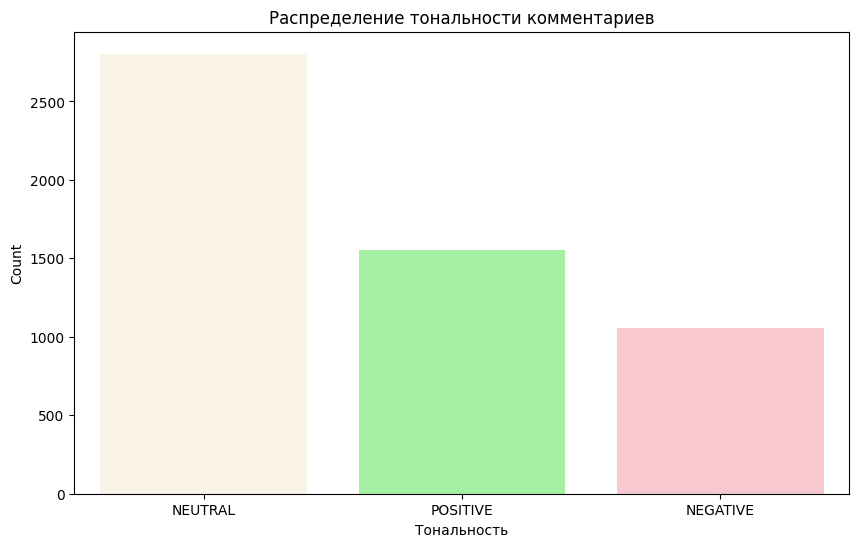

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#посчитаем распределение тональностей комментариев
sentiment_distribution = comments_df_cleanned['sentiment'].value_counts()

#Преобразуем в датафрейм для более удобного отображения
sentiment_distribution_df = sentiment_distribution.reset_index()
sentiment_distribution_df.columns = ['sentiment', 'count']

#зададим кастомные цвета
colors = {'POSITIVE': 'palegreen', 'NEGATIVE': 'pink', 'NEUTRAL': 'oldlace'}

#выведем график распределения тональности комментариев
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='count', hue='sentiment', data=sentiment_distribution_df, palette=colors, dodge=False, legend=False)
plt.title('Распределение тональности комментариев')
plt.xlabel('Тональность')
plt.ylabel('Count')
plt.show()

In [ ]:
#попробуем определить именованные сущности с помощью предобученной модели, чтобы потом выделить негатив/позитив для них
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)


ner_results = comments_df_cleanned['text'].apply(nlp)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
ner_results

0                                                      []
1       [{'entity': 'B-ORG', 'score': 0.81344503, 'ind...
2       [{'entity': 'B-PER', 'score': 0.5915759, 'inde...
3                                                      []
4                                                      []
                              ...                        
5412                                                   []
5413                                                   []
5414    [{'entity': 'I-LOC', 'score': 0.64522004, 'ind...
5415                                                   []
5416                                                   []
Name: text, Length: 5417, dtype: object

In [ ]:
def extract_names(ner_result):
    return [entity['word'] for entity in ner_result if entity['entity'] == 'B-PER']

# применим функцию к результатам NER
comments_df_cleanned['names'] = ner_results.apply(extract_names)

# разворачиваем список имен для каждого комментария
all_names = [name for sublist in comments_df_cleanned['names'] for name in sublist]

# подсчет частоты встречаемости имен
name_counts = pd.Series(all_names).value_counts().reset_index()
name_counts.columns = ['name', 'count']

# определим тональности для каждого имени
def sentiment_for_names(row):
    sentiment_dict = {}
    for name in row['names']:
        if name not in sentiment_dict:
            sentiment_dict[name] = {'POSITIVE': 0, 'NEGATIVE': 0, 'NEUTRAL': 0}
        sentiment_dict[name][row['sentiment']] += 1
    return sentiment_dict

# применим функцию к каждому ряду
sentiment_data = comments_df_cleanned.apply(sentiment_for_names, axis=1)

# объединим результаты в один словарь
final_sentiment = {}
for data in sentiment_data:
    for name, sentiments in data.items():
        if name not in final_sentiment:
            final_sentiment[name] = sentiments
        else:
            for sentiment, count in sentiments.items():
                final_sentiment[name][sentiment] += count

# преобразуем в датафрейм для удобного отображения
sentiment_df = pd.DataFrame(final_sentiment).T.reset_index()
sentiment_df.columns = ['name', 'positive', 'negative', 'neutral']

# объединим частоты и тональности
final_df = pd.merge(name_counts, sentiment_df, on='name')

In [ ]:
#выведем получившийся датафрейм
final_df

,name,count,positive,negative,neutral
0,К,42,18,6,18
1,Д,10,3,3,4
2,А,10,3,0,7
3,О,8,5,1,2
4,С,6,1,1,4
5,У,6,1,0,5
6,Б,4,1,1,2
7,И,4,1,1,2
8,Ш,4,1,2,1
9,Х,3,0,1,2


##Из-за того, что модель была обучена на английском языке, выделять именнованные сущности на русском у неё не получается. К сожалению, достичь цели и получить оценку контекста упоминания имён в комментариях при помощи данной модели не получилось.

In [ ]:
#решили не сдаваться и попробовать другую модель, обученную на русском – https://habr.com/ru/articles/647357/
!pip install spacy
!python -m spacy download ru_core_news_sm
import spacy
nlp = spacy.load('ru_core_news_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 43.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# функция для извлечения именованных сущностей из текста
def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'PER']

# примененяем модель NER к комментариям
comments_df_cleanned['entities'] = comments_df_cleanned['text'].apply(extract_entities)

# разворачиваем список имен для каждого комментария
all_entities = [entity for sublist in comments_df_cleanned['entities'] for entity in sublist]

# подсчитаем частоты встречаемости именованных сущностей
entity_counts = pd.Series(all_entities).value_counts().reset_index()
entity_counts.columns = ['entity', 'count']

# определим тональности для каждой сущности
def sentiment_for_entities(row):
    sentiment_dict = {}
    for entity in row['entities']:
        if entity not in sentiment_dict:
            sentiment_dict[entity] = {'POSITIVE': 0, 'NEGATIVE': 0, 'NEUTRAL': 0}
        sentiment_dict[entity][row['sentiment']] += 1
    return sentiment_dict

# применим функцию к каждому ряду
sentiment_data = comments_df_cleanned.apply(sentiment_for_entities, axis=1)

# объединим результаты в один словарь
final_sentiment = {}
for data in sentiment_data:
    for entity, sentiments in data.items():
        if entity not in final_sentiment:
            final_sentiment[entity] = sentiments
        else:
            for sentiment, count in sentiments.items():
                final_sentiment[entity][sentiment] += count

# преобразуем в датафрейм для удобного отображения
sentiment_df = pd.DataFrame(final_sentiment).T.reset_index()
sentiment_df.columns = ['entity', 'positive', 'negative', 'neutral']

# объединим частоты и тональности
final_df = pd.merge(entity_counts, sentiment_df, on='entity')

In [ ]:
final_df

,entity,count,positive,negative,neutral
0,Кейт,831,264,99,468
1,Луи,114,25,25,64
2,Шарлотта,80,11,11,58
3,Анна,79,18,0,61
4,Софи,73,23,9,41
...,...,...,...,...,...
559,Глостерские,1,0,0,1
560,Королева Камилла,1,0,0,1
561,Вас Господь,1,1,0,0
562,Шарлотт,1,0,1,0


In [ ]:
#модель обученная на русском языке отработала хорошо, выделила правилььно именованные сущности и определила характер упоминания

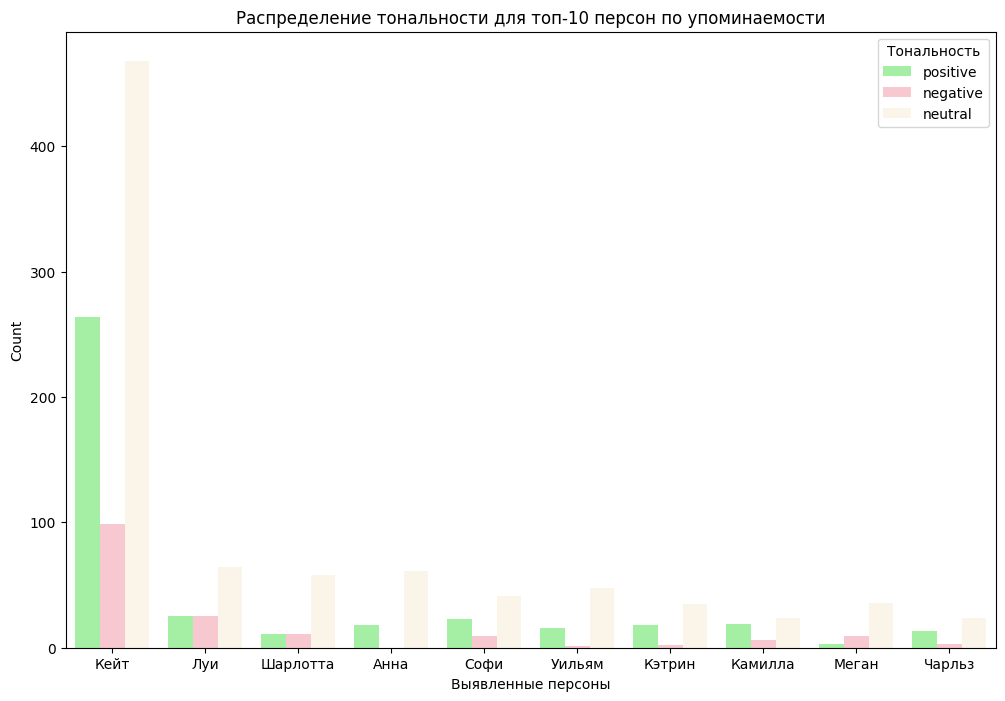

In [ ]:
#визуализируем топ-10 упоминаний по частоте в виде графика
top_entities = final_df.head(10)

# преобразование данных для визуализации
melted_df = top_entities.melt(id_vars=['entity', 'count'], value_vars=['positive', 'negative', 'neutral'], var_name='sentiment', value_name='value')

plt.figure(figsize=(12, 8))
sns.barplot(x='entity', y='value', hue='sentiment', data=melted_df, palette={'positive': 'palegreen', 'negative': 'pink', 'neutral': 'oldlace'})
plt.title('Распределение тональности для топ-10 персон по упоминаемости')
plt.xlabel('Выявленные персоны')
plt.ylabel('Count')
plt.legend(title='Тональность')
plt.show()

По графику выше видим, что Кейт безусловный фаворит комментаторов – у неё больше всего упоминаний, так же как и больше всего позитива и негатива. На 2 и 3 местах по упоминаемости – принц луи и принцесса Шарлотта. Отсортируем датафрейм по столбцам с позитивом и негативом, чтобы выявить топ-3 персоны по позитивным и негативным упоминаниям

In [ ]:
final_df.sort_values('positive', ascending = False)

,entity,count,positive,negative,neutral
0,Кейт,831,264,99,468
1,Луи,114,25,25,64
4,Софи,73,23,9,41
15,Ура,22,21,1,0
7,Камилла,49,19,6,24
...,...,...,...,...,...
302,Уаааа,1,0,1,0
301,Начо Фигерас,1,0,0,1
133,Майкл Кентский,2,0,0,2
297,Блииин,1,0,0,1


In [ ]:
final_df.sort_values('negative', ascending = False)

,entity,count,positive,negative,neutral
0,Кейт,831,264,99,468
1,Луи,114,25,25,64
2,Шарлотта,80,11,11,58
26,Блин,12,1,10,1
4,Софи,73,23,9,41
...,...,...,...,...,...
235,дейли мейл,1,0,0,1
233,Тиндаллов,1,0,0,1
232,Взгляд,1,0,0,1
231,Принцессу Уэльскую,1,1,0,0


В топе по позитивным упоминаниям – Кейт, Луи и Софи, в топе по негативным упоминаниям – Кейт, Луи и Шарлотта

#Выводы

1. Мы проанализировали 5417 комментариев – большинство из них оказались нейтральными со значительной долей позитивных (примерно 1500)
2. Использовали 2 разных модели для определения тональности упоминания членов королевской семьи в комментариях – с помощью модели ru_core_news_sm смогли определить кто получает больше позитива и негатива и кто чае всего упоминается вв комментариях
3. Самые часто упоминаемые члены королевской семьи с 13 по 16 июня были Кейт, Луи и Шарлотта
4. Топ-3 по негативным упоминаниям составляют Кейт, Луи и Шарлотта, а по позитивным – Кейт, Луи и Софи
5. Наша изначальная гипотеза о том, что в топе по негативу будет Камилла не подтвердилась – хоть она и входит в топ-10 по упоминаемости, про неё больше позитива, чем негатива